In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer 
import nltk
%matplotlib inline

In [2]:
books_original = pd.read_csv('books.csv')
reviews_original = pd.read_csv('Reviews_14910_books.csv')

In [3]:
books = books_original.copy()
reviews = reviews_original.copy()

In [4]:
books.head()

,isbn10,isbn13,rating-avg,rating-count,title,description,genres
0,1515908569,9.781516e+12,3.42,270.0,The Games : A Global History of the Olympics,Renowned sportswriter David Goldblatt has been...,"'history', 'non-fiction', 'sports', 'european-..."
1,552576484,9.780553e+12,4.07,287187.0,"Everything, Everything","<b><i>Everything, Everything</i> is now a majo...","'young-adult', 'romance', 'contemporary', 'fic..."
2,262511878,9.780263e+12,3.69,23.0,The Size of Nations,The authors of this timely and provocative boo...,"'economics', 'politics', 'history', 'education..."
3,995418306,9.780995e+12,3.89,358.0,Sascha Martin's Rocket-Ship,"""The story is 'poetry in motion' for rocket sh...","'childrens', 'amazon', 'juvenile', 'middle-gra..."
4,1617455407,9.781617e+12,4.00,1.0,The Art of Mixing Textiles in Quilts : 14 Proj...,"Have a ball blending cottons with rich wools, ...","'quilting', 'crafts'"


In [5]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344639 entries, 0 to 344638
Data columns (total 7 columns):
isbn10          344639 non-null object
isbn13          344639 non-null float64
rating-avg      344639 non-null float64
rating-count    344639 non-null float64
title           344639 non-null object
description     344639 non-null object
genres          344639 non-null object
dtypes: float64(3), object(4)
memory usage: 18.4+ MB


In [6]:
books.nunique()

isbn10          344639
isbn13          344639
rating-avg         308
rating-count     20194
title           294640
description     321624
genres          210712
dtype: int64

In [7]:
#print description for inspection 
for x in range(0,50): 
    print(books.loc[x,'description'])

Renowned sportswriter David Goldblatt has been hailed by the Wall Street Journal for writing "with the expansive eye of a social and cultural critic." In The Games Goldblatt delivers a magisterial history of the biggest sporting event of them all: the Olympics. He tells the epic story of the Games from their reinvention in Athens in 1896 to the present day, chronicling classic moments of sporting achievement from Jesse Owens to Nadia Comaneci, the Miracle on Ice to Usain Bolt. He goes beyond the medal counts to explore how international conflicts have played out at the Olympics, including the role of the Games in Fascist Germany and Italy, the Cold War, and the struggles of the postcolonial world for recognition. He also tells the extraordinary story of how women fought to be included on equal terms, how the Paralympics started in the wake of World War II, and how the Olympics reflect changing attitudes to race and ethnicity.
<b><i>Everything, Everything</i> is now a major motion pictu

In [8]:
#make original copy of description
books['description_original'] = books['description']

### Text Cleaning 

In [9]:
add_sw = ['new','york','times','bestseller','bestselling','author','prize','putlizer']
sw = STOPWORDS.union(set(add_sw))

In [10]:
def clean_text(text):
    text = text.lower()
    text = re.sub('<.*?>', ' ', text) #remove tags 
    text = re.sub(r'[^\w\s]',' ',text) #remove punctuations
    #Remove stop words
    text = re.split(r'[^\w]+',text) 
    text_filtered = [w for w in text if not w in sw]
    #Lemmatize 
    lemmatizer = WordNetLemmatizer()
    text_lemmatized = [lemmatizer.lemmatize(w) for w in text_filtered]
    #remove short words
    text_filtered = [w for w in text_lemmatized if len(w)>1]
    text_filtered = ' '.join(text_filtered).strip()
    return text_filtered

In [11]:
books['description'] = books['description'].apply(lambda x: clean_text(x))

### Length of description and genres

In [12]:
books['description_length'] = books['description'].apply(lambda x: len(x.split()))
books['genres_length'] = books['genres'].apply(lambda x: len(x.split()))

In [13]:
books.head()

,isbn10,isbn13,rating-avg,rating-count,title,description,genres,description_original,description_length,genres_length
0,1515908569,9.781516e+12,3.42,270.0,The Games : A Global History of the Olympics,renowned sportswriter david goldblatt hailed w...,"'history', 'non-fiction', 'sports', 'european-...",Renowned sportswriter David Goldblatt has been...,85,9
1,552576484,9.780553e+12,4.07,287187.0,"Everything, Everything",major motion picture starring amanda stenberg ...,"'young-adult', 'romance', 'contemporary', 'fic...","<b><i>Everything, Everything</i> is now a majo...",61,17
2,262511878,9.780263e+12,3.69,23.0,The Size of Nations,author timely provocative book use tool econom...,"'economics', 'politics', 'history', 'education...",The authors of this timely and provocative boo...,126,6
3,995418306,9.780995e+12,3.89,358.0,Sascha Martin's Rocket-Ship,story poetry motion rocket ship manuela pentan...,"'childrens', 'amazon', 'juvenile', 'middle-gra...","""The story is 'poetry in motion' for rocket sh...",189,5
4,1617455407,9.781617e+12,4.00,1.0,The Art of Mixing Textiles in Quilts : 14 Proj...,ball blending cotton rich wool lustrous silk t...,"'quilting', 'crafts'","Have a ball blending cottons with rich wools, ...",48,2


###### Description Length

In [14]:
data = books['description_length']
print('Number of words in description \n')
print('Maximum :', data.max())
print('Minimum :', data.min())
print('Mean :', data.mean())
print('Median :', data.median())
print('25th Percentile :', data.quantile(0.25))
print('75th Percentile :', data.quantile(0.75))

Number of words in description 

Maximum : 2405
Minimum : 0
Mean : 84.88352740113568
Median : 78.0
25th Percentile : 52.0
75th Percentile : 108.0


In [15]:
#Number of books with more than 150 words in description
description_more_150 = books[books['description_length'] >= 150]
print('Percentage of books with more than 150 words in description:', len(description_more_150) / len(books) * 100)
print('Number of books with more than 150 words in description:',  len(description_more_150))

Percentage of books with more than 150 words in description: 8.883498385266902
Number of books with more than 150 words in description: 30616


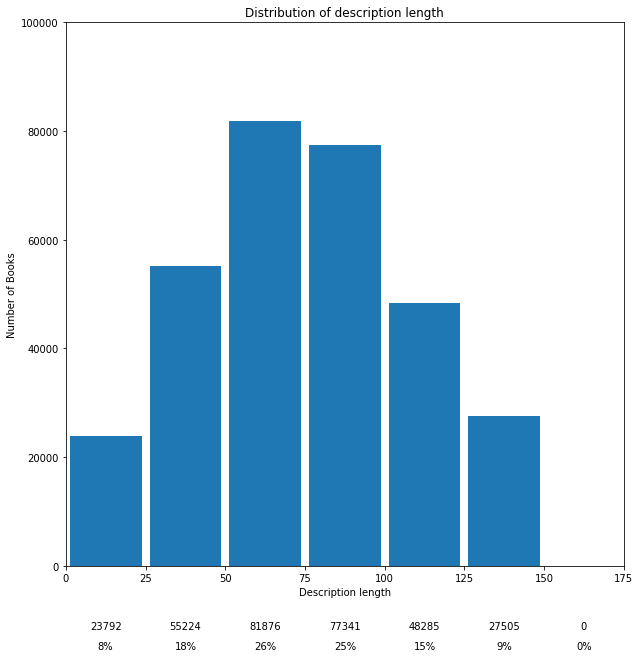

In [16]:
#Distribution of description - for books with fewer than 150 descriptions
description_less_150 = books[books['description_length'] < 150]
data = description_less_150['description_length']
bins = np.arange(0,200,25)
fig, ax = plt.subplots(figsize=(10,10))
hist, edges = np.histogram(data, bins=bins)
plt.hist(data,bins = bins, rwidth = 0.9)
plt.title("Distribution of description length")
plt.ylabel("Number of Books")
plt.xlabel("Description length")
plt.xticks(bins)
plt.xlim(min(bins), max(bins))
plt.ylim(0,100000)

# Label the raw counts
for number, x in zip(hist, edges):
    # Label the raw counts
    labels = (bins[1] - bins[0])/2
    ax.annotate(str(number), xy=(x+labels, 0),
        xytext=(0, -55), textcoords='offset points', va='top', ha='center')

    # Label the percentages
    percent = '%0.00f%%' % (100 * float(number) / hist.sum())
    ax.annotate(percent, xy=(x+labels, 0), 
        xytext=(0, -75), textcoords='offset points', va='top', ha='center')

In [17]:
#Inspect description which have fewer than 50 words
description_less_50 = books[(books['description_length'] < 50)].reset_index(drop=True)

for x in range(0,50):
    print(x)
    print(description_less_50.loc[x,'description'])

0
ball blending cotton rich wool lustrous silk textural home decor fabric quilt beg touched weave unconventional textile like pro best advice cutting sewing pressing fabric texture sheen craft 14 pieced appliqued project like table runner quilt pincushion tote bag dimensional exciting mixed fabric quilt ripe scrap expanding horizon
1
publisher note product purchased party seller guaranteed publisher quality authenticity access online entitlement included product troubleshoot tune optimize oracle database efficiently successfully time book explains advantage revolutionary oracle wait interface quickly pinpoint solve core problem bottleneck increase productivity exponentially
2
little critter class going critterville museum natural history excited class arrives dinosaur exhibit closed missing triceratops bone join little critter search hall gem mineral climb tree rain forest sneak planetarium solve mystery lost dinosaur bone
3
zoe walker see photo classified section london newspaper dete

###### Genre Length

Number of Genres Description

Maximum : 42
Minimum : 1
Mean : 9.747953655854387
Median : 8.0
25th Percentile : 3.0
75th Percentile : 15.0


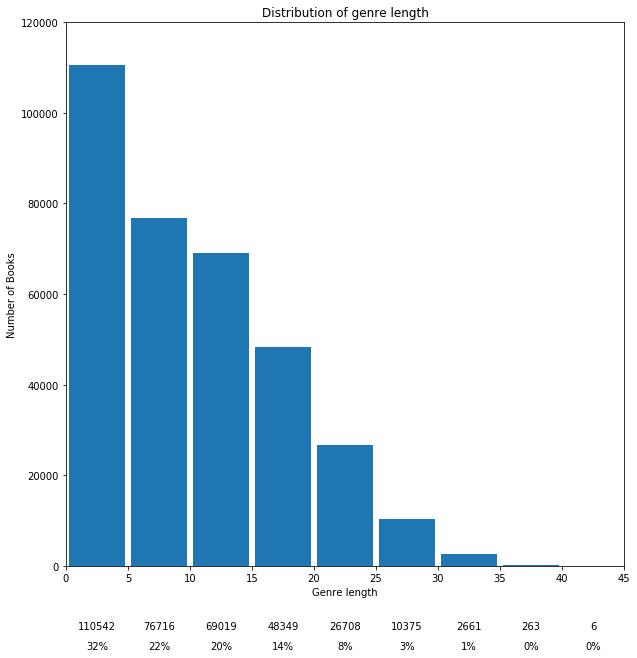

In [18]:
#Distribution of genres length
data = books['genres_length']
print('Number of Genres Description\n')
print('Maximum :', data.max())
print('Minimum :', data.min())
print('Mean :', data.mean())
print('Median :', data.median())
print('25th Percentile :', data.quantile(0.25))
print('75th Percentile :', data.quantile(0.75))

bins = np.arange(0,50,5)
fig, ax = plt.subplots(figsize=(10,10))
hist, edges = np.histogram(data, bins=bins)
plt.hist(data,bins = bins, rwidth = 0.9)
plt.title("Distribution of genre length")
plt.ylabel("Number of Books")
plt.xlabel("Genre length")
plt.xlim(min(bins), max(bins))
plt.ylim(0,120000)

# Label the raw counts
for number, x in zip(hist, edges):
    # Label the raw counts
    labels = (bins[1] - bins[0])/2
    ax.annotate(str(number), xy=(x+labels, 0),
        xytext=(0, -55), textcoords='offset points', va='top', ha='center')

    # Label the percentages
    percent = '%0.00f%%' % (100 * float(number) / hist.sum())
    ax.annotate(percent, xy=(x+labels, 0), 
        xytext=(0, -75), textcoords='offset points', va='top', ha='center')

In [19]:
#Remove books with fewer than 50 description words and fewer than 5 genres 
rows = len(books)
books_cleaned = books[(books['description_length'] >= 25) & (books['genres_length'] >= 5) ].reset_index(drop=True)
rows1 = len(books_cleaned)
print('Original data size:', rows)
print('New data size:', rows1)
print('Number of rows dropped:', rows - rows1)
print('Percentage of rows dropped:',(rows - rows1)/rows*100 )

Original data size: 344639
New data size: 219844
Number of rows dropped: 124795
Percentage of rows dropped: 36.210353442297595


In [20]:
books_cleaned.head()

,isbn10,isbn13,rating-avg,rating-count,title,description,genres,description_original,description_length,genres_length
0,1515908569,9.781516e+12,3.42,270.0,The Games : A Global History of the Olympics,renowned sportswriter david goldblatt hailed w...,"'history', 'non-fiction', 'sports', 'european-...",Renowned sportswriter David Goldblatt has been...,85,9
1,552576484,9.780553e+12,4.07,287187.0,"Everything, Everything",major motion picture starring amanda stenberg ...,"'young-adult', 'romance', 'contemporary', 'fic...","<b><i>Everything, Everything</i> is now a majo...",61,17
2,262511878,9.780263e+12,3.69,23.0,The Size of Nations,author timely provocative book use tool econom...,"'economics', 'politics', 'history', 'education...",The authors of this timely and provocative boo...,126,6
3,995418306,9.780995e+12,3.89,358.0,Sascha Martin's Rocket-Ship,story poetry motion rocket ship manuela pentan...,"'childrens', 'amazon', 'juvenile', 'middle-gra...","""The story is 'poetry in motion' for rocket sh...",189,5
4,147898757X,9.781479e+12,3.83,2043.0,Factory Man : How One Furniture Maker Battled ...,instant man battle save hundred job demonstrat...,"'non-fiction', 'business', 'history', 'biograp...","""The instant ""New York Times"" bestseller about...",93,16


### Filter for fiction books only

In [21]:
# Filter for fiction books but not non-fiction
books_fiction = books_cleaned[books_cleaned['genres'].str.contains('fiction', na=False) & ~books_cleaned['genres'].str.contains('non-fiction', na=False)].reset_index(drop=True)
print(books_fiction.shape)
books_fiction.head()

(95508, 10)


,isbn10,isbn13,rating-avg,rating-count,title,description,genres,description_original,description_length,genres_length
0,552576484,9.780553e+12,4.07,287187.0,"Everything, Everything",major motion picture starring amanda stenberg ...,"'young-adult', 'romance', 'contemporary', 'fic...","<b><i>Everything, Everything</i> is now a majo...",61,17
1,241255775,9.780241e+12,3.63,1129.0,Anna of the Five Towns,deeply moving original dealing material encoun...,"'classics', 'fiction', 'historical-fiction', '...","<b>'Deeply moving, original, and dealing with ...",54,18
2,1536607398,9.781537e+12,4.11,893.0,Ghost Run,acclaimed eagerly anticipated fourth thriller ...,"'zombies', 'horror', 'post-apocalyptic', 'fict...",The acclaimed and eagerly anticipated fourth t...,82,12
3,719078385,9.780719e+12,3.23,440.0,"Epicene, or the Silent Woman : By Ben Jonson",epicene widely studied johnson play brilliantl...,"'plays', 'drama', 'classics', '17th-century', ...",<i>Epicene </i>is now one of the most widely-s...,93,15
4,60539526,9.780061e+12,4.01,274.0,Little Critter : The Lost Dinosaur Bone,little critter class going critterville museum...,"'picture-books', 'dinosaurs', 'science', 'fict...",Little Critter's class is going to the Critter...,35,9


### Final cleaned df

In [22]:
#books_fiction.to_csv('books_cleaned_v4.csv', index = False)

In [23]:
#filter for first 50k books
books_fiction_50k = books_fiction[:50000]

### Cleaning Reviews

In [24]:
reviews.head()

,isbn13,gid,name,review
0,9.781516e+12,30155894.0,Allison,"\nI love history and historical books, but thi..."
1,9.781516e+12,30155894.0,Mike Bechtel,"\nWell certainly comprehensive, I found this t..."
2,9.781516e+12,30155894.0,Lori,I am not one of those people who gets involved...
3,9.781516e+12,30155894.0,Maria,Starting in 1896 with Athens the Olympics were...
4,9.781516e+12,30155894.0,Hannah,I received this book free from Netgalley in e...


In [25]:
rows = len(reviews)
unique_books_original = reviews.isbn13.nunique()

#Drop reviews which are not in final books set 
reviews.drop(reviews[~reviews['isbn13'].isin(books_fiction_50k['isbn13'])].index, inplace = True)
rows1 = len(reviews)

#Print description
print('Original number of reviews:', rows)
print('Original number of unique books:', unique_books_original)

print('\nNew number of reviews:', rows1)
print('New number of unique books:', reviews.isbn13.nunique())

print('\nNumber of reviews dropped:', rows - rows1)
print('Number of unique books dropped:', unique_books_original - reviews.isbn13.nunique())

Original number of reviews: 264106
Original number of unique books: 14910

New number of reviews: 40097
New number of unique books: 1507

Number of reviews dropped: 224009
Number of unique books dropped: 13403


In [26]:
reviews = reviews.reset_index(drop = True)

In [27]:
for x in range (0,50):
    print(x)
    print(reviews.loc[x,'review'])

0
This is a book I expected to LOVE.It's a book many of my GR friends have loved.It's a book I 
was
 kind of liking until the thing happens......the thing that just cheapens the entire story.I have been dying to read Everything, Everything. The reviews were all positive, it received a Kirkus star, it sounded so different... all these reasons added up to one of my most anticipated reads of the year. And it started quite beautifully-written with diverse characters, including an Afro-Asian narrator called Madeline. Madeline's condition aside - being allergic to the entire world outside her sterile home - it quickly became evident that the book wasn't as unique as I'd anticipated. It follows in the footsteps of the great doomed love cheesefest of our time - The Fault in Our Stars - and other clones like All the Bright Places.Unlike the aforementioned two, though, I found myself enjoying this book. It was more cheesy than sweet, in my opinion, but I still enjoyed the emphasis on the human n

In [28]:
reviews.isnull().any()

isbn13    False
gid       False
name      False
review    False
dtype: bool

In [29]:
#Clean reviews
reviews['review_cleaned'] = reviews['review'].apply(lambda x: clean_text(x))

In [30]:
#Length of reviews 
reviews['review_length'] = reviews['review_cleaned'].apply(lambda x: len(x.split()))

In [31]:
#Distribution of genres length
data = reviews['review_length']
print('Review Length Description\n')
print('Maximum :', data.max())
print('Minimum :', data.min())
print('Mean :', data.mean())
print('Median :', data.median())
print('25th Percentile :', data.quantile(0.25))
print('75th Percentile :', data.quantile(0.75))

Review Length Description

Maximum : 3207
Minimum : 0
Mean : 98.86482779260294
Median : 58.0
25th Percentile : 22.0
75th Percentile : 130.0


In [32]:
#Number of long reviews (more than 250 words)
reviews_more_250 = reviews[reviews['review_length'] >= 250]
print('Number of reviews with more than 250 words:', len(reviews_more_250))
print('Number of unique books with more than 250 words:', reviews_more_250.review_length.nunique())
print('Percentage of reviews with more than 250 words:', len(reviews_more_250)/len(reviews)*100)

Number of reviews with more than 250 words: 3497
Number of unique books with more than 250 words: 607
Percentage of reviews with more than 250 words: 8.721350724493105


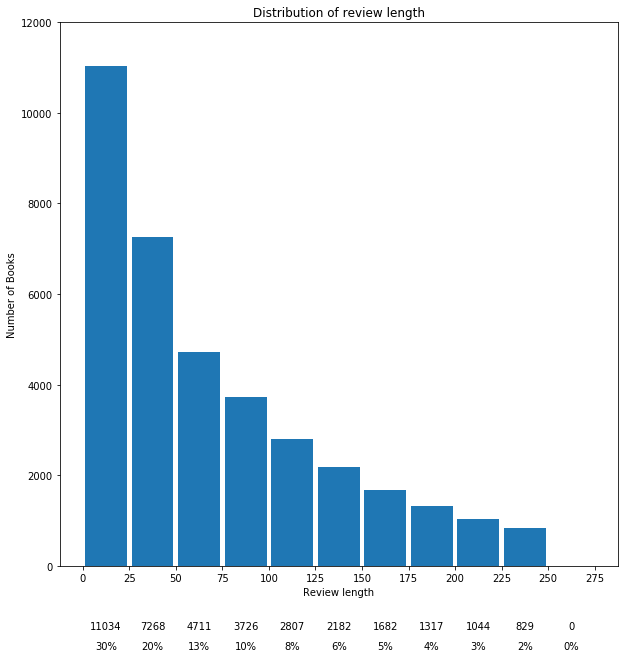

In [33]:
#Distribution of review length for reviews fewer than 250 words 
reviews_less_250 = reviews[reviews['review_length'] < 250]
data = reviews_less_250['review_length']

bins = np.arange(0,300,25)
fig, ax = plt.subplots(figsize=(10,10))
hist, edges = np.histogram(data, bins=bins)
plt.hist(data,bins = bins, rwidth = 0.9)
plt.title("Distribution of review length")
plt.ylabel("Number of Books")
plt.xlabel("Review length")
plt.xticks(bins)
plt.ylim(0,12000)

# Label the raw counts
for number, x in zip(hist, edges):
    # Label the raw counts
    labels = (bins[1] - bins[0])/2
    ax.annotate(str(number), xy=(x+labels, 0),
        xytext=(0, -55), textcoords='offset points', va='top', ha='center')

    # Label the percentages
    percent = '%0.00f%%' % (100 * float(number) / hist.sum())
    ax.annotate(percent, xy=(x+labels, 0), 
        xytext=(0, -75), textcoords='offset points', va='top', ha='center')

In [34]:
#Keep reviews that are between 25 and 50 words
reviews_cleaned = reviews[reviews['review_length'].between(25,50)].reset_index(drop = True)

print('Number of reviews:', len(reviews_cleaned))
print('Number of unique books:', reviews_cleaned.isbn13.nunique())

Number of reviews: 7496
Number of unique books: 1435


In [35]:
#reviews_cleaned.to_csv('reviews_cleaned_short.csv', index = False)